In [2]:
import sys

sys.path.insert(0, "..")

In [3]:
from pprint import pprint
import os
from pathlib import Path
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import ImageGrid

import numpy as np
import nibabel as nib

root_dir = Path(os.getcwd()).parent
data_dir = root_dir / "data" / "ACDC" / "database" / "training"
patient_no = "001"
patient = f"patient{patient_no}"

config = np.loadtxt(data_dir / patient / "Info.cfg", dtype=str, delimiter=":")
pprint(config)

end_diastole = int(config[0, 1])
end_systole = int(config[1, 1])

array([['ED', ' 1'],
       ['ES', ' 12'],
       ['Group', ' DCM'],
       ['Height', ' 184.0'],
       ['NbFrame', ' 30'],
       ['Weight', ' 95.0']], dtype='<U7')


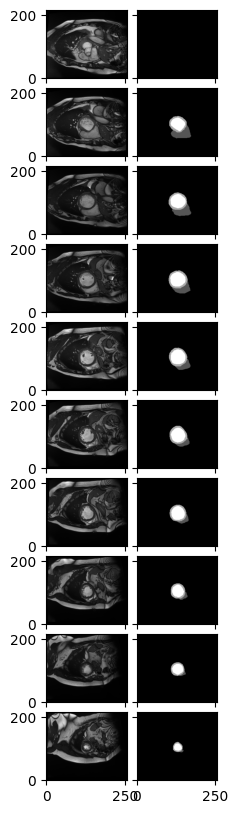

In [28]:
img = nib.load(data_dir / patient / f"patient{patient_no}_frame0{end_diastole}.nii.gz")
img = img.get_fdata()

gt = nib.load(data_dir / patient / f"patient{patient_no}_frame0{end_diastole}_gt.nii.gz")
gt = gt.get_fdata()

slices = img.shape[2]
fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111, nrows_ncols=(slices, 2), axes_pad=0.1)

images = []
for i in range(slices):
    images.append(img[:, :, i])
    images.append(gt[:, :, i])

for ax, image in zip(grid, images):
    ax.imshow(image, cmap="gray", origin="lower")

plt.show()

In [ ]:
from monai.utils import set_determinism

set_determinism(seed=0)